# Introduction

This notebook contains the code used to analyse app data collected as part of the CCC: Graphs beta-test.

# Imports and Global Variables

In [88]:
# Packages 

import csv                            # To load and save the data files
from itertools import repeat, cycle   # To iterate over arrays
import os                             # To navigate directories
import ast                            # To evaluate a string containing a Python literal.
import numpy as np                    # To create arrays and perform mathematical operations
import pandas as pd                   # To create dataframes
import matplotlib.pyplot as plt       # To draw plots
import seaborn as sns                 # To draw plots

%matplotlib inline

SAVE_FIG = True

In [89]:
# Different colour palletes used to colour graphs

SEVEN_COLORS = ['#003f5c', '#374c80', '#7a5195', '#bc5090', '#ef5675', '#ff764a', '#ffa600']
SIX_COLORS = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
FIVE_COLORS = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

In [90]:
# Setting the plots to be in an APA format by selecting the style sheet

import matplotlib

matplotlib.style.use(
    matplotlib.get_data_path() + '/stylelib/apa.mplstyle'
)

In [91]:
# A function that removes the spines from a graph

def remove_spines(axis):
    for spine in ('right', 'top'):
        axis.spines[spine].set_visible(False)

In [92]:
# Create an figures directory and function that saves images.

os.makedirs('figures', exist_ok=True)

IMAGES_PATH = os.path.join('.', 'figures')

def save_fig(fig_name, fig_extension="svg"):
    if SAVE_FIG:
        path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
        plt.savefig(path, format=fig_extension)

In [93]:
# Create a function that reads the data files.

DATA_PATH = os.path.join('.', 'data')

def load_data_files(path=DATA_PATH):
    for file in os.listdir(path):
        with open(os.path.join(path, file)) as csv_file:
            yield csv.reader(csv_file)

In [94]:
# Function that counts the number of peeks and the time spent peeking per question

def get_peek_data(data_file):
    peek_data = []
    current_question_number = -1
    total_peek_time = 0
    total_peek_count = 0
    peek_time = 0

    for entry in data_file:
        question_number = float(entry[1])
        time = float(entry[0])

        if  question_number > current_question_number:
            current_question_number = question_number
            peek_data.append({'peek_time': total_peek_time, 'peek_count': total_peek_count})
            total_peek_count = 0
            total_peek_time = 0
            continue

        if entry[2] == 'peek':
            data = ast.literal_eval(entry[3])
            if data['peeking']:
                peek_time = time
                total_peek_count += 1
            else:
                total_peek_time += time - peek_time
                
    return peek_data

In [95]:
# Gather data and create a peek dataframe

def repeated_int(repeats, start=1, stop=19):
    for i in range(start, stop):
        for _ in range(repeats):
            yield i
        
peek_df = pd.DataFrame(index=range(1, 8))

for i, data_file in enumerate(load_data_files(), start=1):
    peek_data = get_peek_data(data_file)
    temp = pd.DataFrame(peek_data)
    temp.rename(columns={'peek_time': f'{i}time', 'peek_count': f'{i}count'}, inplace=True)
    peek_df = peek_df.join(temp)

outer = list(repeated_int(2))
inner = cycle(['time', 'count'])
hier_index = list(zip(outer, inner))
peek_df.columns = pd.MultiIndex.from_tuples(hier_index)

peek_df

1          2                3                4                5   \
        time count time count       time count       time count       time   
1    0.00000   0.0  0.0   0.0    0.00000   0.0    0.00000   0.0  221.80032   
2    0.00000   0.0  0.0   0.0    0.00000   0.0    0.00000   0.0   63.43676   
3  548.71831   2.0  0.0   0.0  629.50920   1.0    0.00000   0.0  120.58694   
4    0.00000   0.0  0.0   0.0  242.37150   2.0  689.42874   1.0  191.81875   
5    0.00000   0.0  0.0   0.0  181.79732   1.0  362.83408   3.0  218.71431   
6        NaN   NaN  0.0   0.0        NaN   NaN        NaN   NaN  243.12177   
7        NaN   NaN  NaN   NaN        NaN   NaN        NaN   NaN    0.00000   

         ...   14         15               16                17        \
  count  ... time count time count       time count        time count   
1     3  ...  0.0   0.0  0.0   0.0    0.00000     0     0.00000   0.0   
2     7  ...  0.0   0.0  0.0   0.0    0.00000     0     0.00000   0.0   
3     6  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
4     5  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
5     2  ...  0.0   0.0  NaN   NaN    0.00000     0     0.00000   0.0   
6     5  ...  0.0   0.0  NaN   NaN    0.00000     0  1097.75877   1.0   
7     0  ...  NaN   NaN  NaN   NaN  592.83671     2         NaN   NaN   

          18        
        time count  
1  236.10098   1.0  
2    0.00000   0.0  
3    0.00000   0.0  
4  796.98482   1.0  
5        NaN   NaN  
6        NaN   NaN  
7        NaN   NaN  

[7 rows x 36 columns]

# Analysis

Max:  34
Mean:  5.888888888888889
Median:  2.0
Mode:  2
All:  [0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 5, 10, 28, 34]


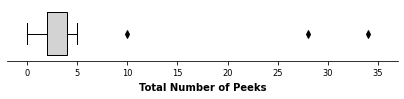

In [96]:
# Finding maximum number of peeks across the participants
from statistics import mean, median, mode

peeks = []
for i in range(1, 19):
    peeks.append(int(peek_df[i]['count'].sum()))

print("Max: ", max(peeks))
print("Mean: ", mean(peeks))
print("Median: ", median(peeks))
print("Mode: ",mode(peeks))
print("All: ",sorted(peeks))

plt.figure(figsize=(7,1))

ax = sns.boxplot(
    x=peeks, 
    linewidth=1,
    boxprops={'facecolor': 'lightgrey', 'edgecolor': 'black'},
)

ax.spines[['left',]].set_visible(False)
ax.set_xlim(-2, 37)
ax.set_xlabel('Total Number of Peeks')
ax.tick_params(left=False)
save_fig('total-peeks-boxplot')

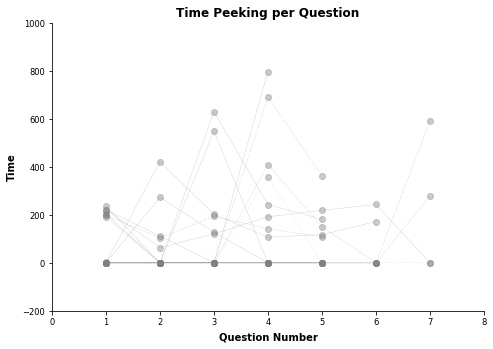

In [119]:
# Plotting time spent peeking per question for each participant

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for i in range(1, 19):
    ax.plot(
        peek_df[i]['time'], 
        lw=0.4, 
        marker='o',
        color='grey',
        alpha=0.4
    )

ax.set_xlabel('Question Number')
ax.set_ylabel('Time')
ax.set_title('Time Peeking per Question')

remove_spines(ax)

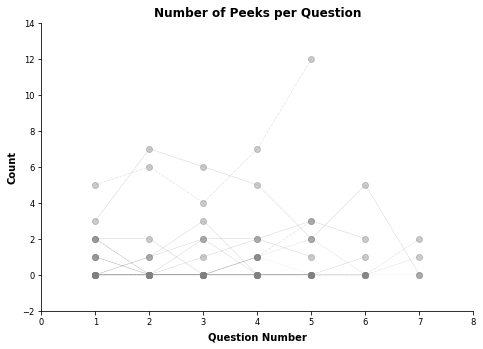

In [120]:
# Plotting number of peeks per question for each participant

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for i in range(1, 19):
    ax.plot(
        peek_df[i]['count'], 
        lw=0.4, 
        marker='o',
        color='grey',
        alpha=0.4
    )

ax.set_xlabel('Question Number')
ax.set_ylabel('Count')
ax.set_title('Number of Peeks per Question')

remove_spines(ax)

In [121]:
# Remove anomalous value

peek_df = peek_df[peek_df < 1000]
peek_df.loc[6][17]

time     NaN
count    1.0
Name: 6, dtype: float64

In [122]:
# Generate a data analysis dataframe containing: 
# Number of Students; Mean Time; Number of Peeks; Number of Peeking Students; 
# and Percentage of Peeking Students per question

import math

data = []

for i in range(1, 8):
    total = 0
    n = 0
    m = 0
    count = 0
    
    for j in range(1, 19):
        value = peek_df.loc[i].loc[j]
        if not math.isnan(value['time']):
            total += value['time']
            n += 1
            count += value['count']
            if value['count']:
                m += 1 

    data.append([n, total/n, int(count), m, m/n])
    
peek_analysis = pd.DataFrame(data, 
                           columns=['Number of Students', "Mean Time", "Number of Peeks", "Number of Peeking Students", "Percentage of Peeking Students"], 
                           index=range(1, 8))

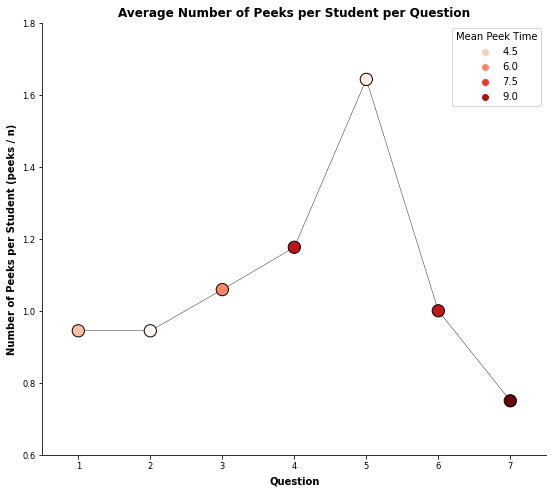

In [151]:
fig = plt.figure(figsize=(7, 6))
ax1 = fig.add_axes([0, 0, 1, 1])

x=peek_analysis.index
y=peek_analysis['Number of Peeks'] / peek_analysis['Number of Students']
hue=peek_analysis['Mean Time'] / peek_analysis['Number of Peeks']
hue[7] = 10

ax = sns.scatterplot(
    x=x, 
    y=y,
    zorder=2,
    hue=hue, 
    edgecolor='black',
    palette='Reds', 
    s=150
)

ax.plot(
    y, 
    zorder=1,
    linewidth=0.4, 
    c='black',
    linestyle='-'
)

ax.legend(title='Mean Peek Time')
ax.set_xlabel('Question')
ax.set_ylabel('Number of Peeks per Student (peeks / n)')
ax.set_title('Average Number of Peeks per Student per Question')

ax.set_xlim(0.5, 7.5)

save_fig('number-of-peeks-per-student-per-question')

Text(0.5, 1.0, 'Mean Time Spent Peeking per Question')

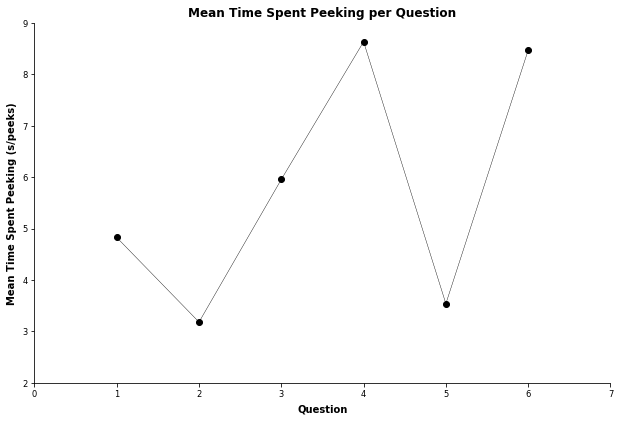

In [145]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.plot(peek_analysis['Mean Time']/peek_analysis['Number of Peeks'][:-1], marker='o', linewidth=0.4)

ax1.set_xlabel('Question')
ax1.set_ylabel('Mean Time Spent Peeking (s/peeks)')
ax1.set_title('Mean Time Spent Peeking per Question')

In [14]:
peek_analysis['Mean Time']/peek_analysis['Number of Peeks']

1     4.825932
2     3.180814
3     5.954821
4     8.631842
5     3.538712
6     8.467246
7    72.688866
dtype: float64

**Hypothesis:** Question 4 may have seen an increase in the number of peeks because that question introduces negative numbers. Students claim to find negative numbers harder (verify conjecture with interview data), and hence used the ability to peek a bit more to help them with the sums. 

This may reveal a hidden benefit of the app, which is the peek function helps to lift the cognitive load of the task.

In [147]:
# Function that gets the time spent per question per participant

def get_question_time(data_file):
    time_data = []
    current_question_number = -1
    question_start = 0

    for entry in data_file:
        question_number = float(entry[1])
        time = float(entry[0])

        if  question_number > current_question_number:
            current_question_number = question_number
            time_data.append(time - question_start)
            question_start = time
                
    return time_data

In [148]:
# Gather data

data = []

for data_file in load_data_files():
    data.append(get_question_time(data_file))
    
time_df = pd.DataFrame(data).T

In [149]:
# Remove the first row (since this is the tutorial)

time_df = time_df.drop(0)

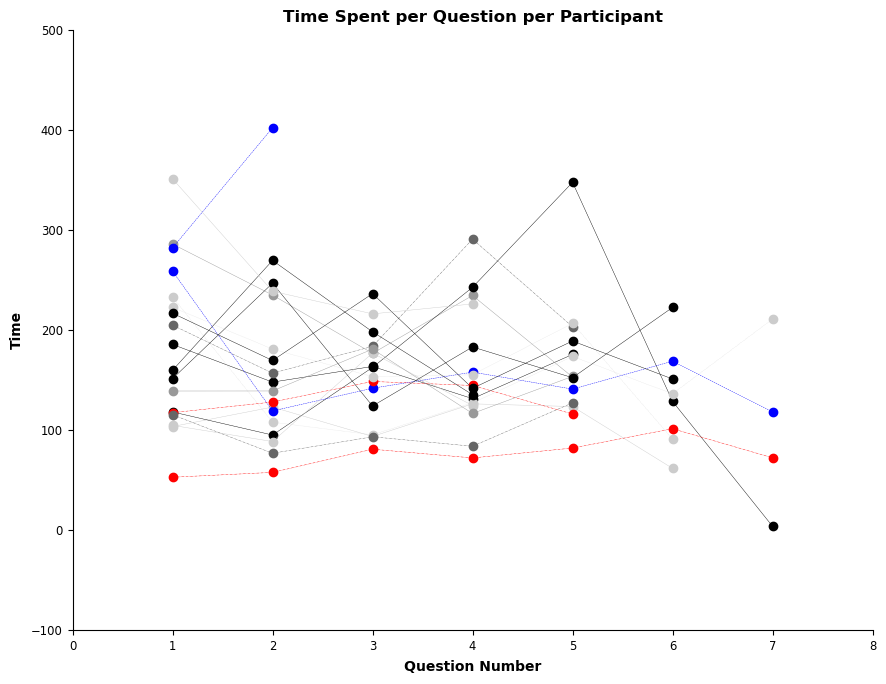

In [150]:
fig = plt.figure(figsize=(8,6), dpi=100)

ax = fig.add_axes([0, 0, 1, 1])
ax.plot(time_df, marker='o', linewidth=0.3)
ax.set_xlabel('Question Number')
ax.set_ylabel('Time')
ax.set_title('Time Spent per Question per Participant')

remove_spines(ax)

In [20]:
# Mean Time per Question

time_df.mean(axis=1)

1    183.823170
2    165.995706
3    154.766363
4    158.760166
5    167.767941
6    132.975147
7    101.553242
dtype: float64

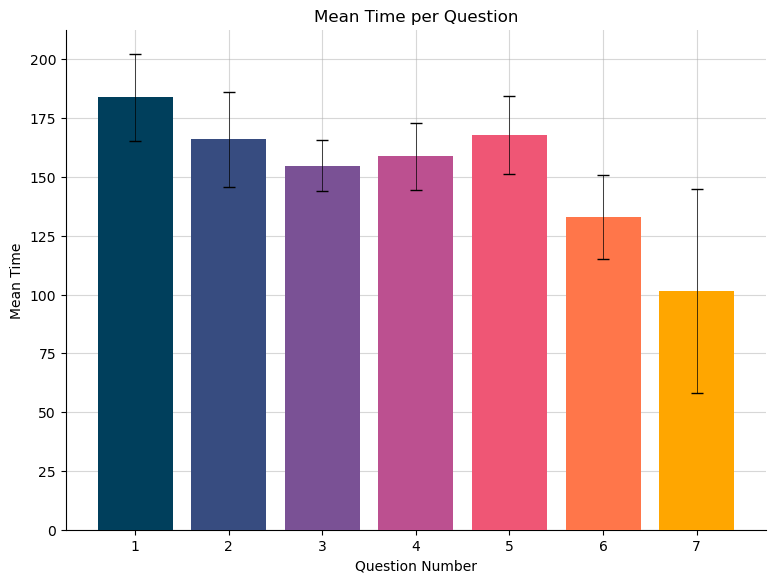

In [21]:
fig = plt.figure(figsize=(7,5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(x=range(1,8), height=time_df.mean(axis=1), color=SEVEN_COLORS, zorder=3,
         yerr=time_df.std(axis=1)/(time_df.count(axis=1)**0.5), error_kw={'capsize': 4, 'elinewidth': 0.5})
ax.grid(alpha = 0.5, zorder=0)
ax.set_xlabel('Question Number')
ax.set_ylabel('Mean Time')
ax.set_title('Mean Time per Question')

remove_spines(ax)

In [22]:
# Explore peeking behaviours in relationship to correct responses. (literature on: temprament and strategies used)

# Focus on on individual students - pick out five students that peeked all the time and five students that peeked
# rarely.

In [23]:
# Create a path to the cleaned data files.

CLEAN_DATA_PATH = os.path.join('.', 'data-clean')

In [24]:
# Function that gets the number of correct responses per question

def get_correct(data_file):
    correct_data = []
    current_question_number = -1
    number_of_correct = 0

    for entry in data_file:
        question_number = float(entry[1])
        time = float(entry[0])

        if  question_number > current_question_number:
            current_question_number = question_number
            correct_data.append(number_of_correct)
            number_of_correct = 0
            continue
            
        if current_question_number == -1:
            continue
        
        if entry[2] == 'solution':
            try:
                data = ast.literal_eval(entry[3][6:-1])
                if data['correct']:
                    number_of_correct += 1
            except:
                continue
                
    return correct_data

In [25]:
data = []
for data_file in load_data_files(CLEAN_DATA_PATH):
    data.append(get_correct(data_file))
    
correct_df = pd.DataFrame(data).T
correct_df = correct_df.drop(0)

correct_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,4.0,0.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,0.0
2,5.0,4.0,3.0,5.0,2.0,4.0,5.0,4.0,5.0,5.0,2.0,5.0,4.0,4.0,0.0,5.0,4.0,2.0
3,3.0,5.0,5.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,NaN,5.0,4.0,1.0
4,5.0,4.0,5.0,4.0,3.0,4.0,5.0,3.0,5.0,4.0,3.0,5.0,5.0,2.0,NaN,5.0,5.0,3.0
5,5.0,5.0,4.0,4.0,1.0,0.0,5.0,5.0,NaN,NaN,5.0,5.0,4.0,1.0,NaN,5.0,5.0,NaN
6,NaN,5.0,NaN,NaN,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,4.0,NaN
7,NaN,NaN,NaN,NaN,0.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [26]:
correct_df.mean(axis=1)

1    3.500000
2    3.777778
3    3.647059
4    4.117647
5    3.857143
6    4.375000
7    2.750000
dtype: float64

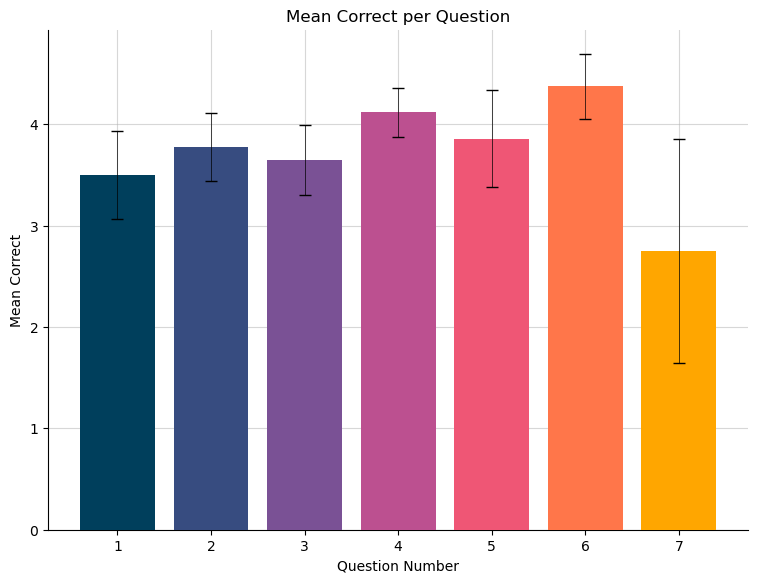

In [27]:
fig = plt.figure(figsize=(7,5), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(x=range(1,8), height=correct_df.mean(axis=1), color=SEVEN_COLORS, zorder=3,
         yerr=correct_df.std(axis=1)/(time_df.count(axis=1)**0.5), error_kw={'capsize': 4, 'elinewidth': 0.5})
ax.grid(alpha = 0.5, zorder=0)

ax.set_xlabel('Question Number')
ax.set_ylabel('Mean Correct')
ax.set_title('Mean Correct per Question')

remove_spines(ax)

In [28]:
# Calculating the correct number of responses per second

cps_df = correct_df / time_df

cps_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0.021515,0.000000,0.003493,0.014621,0.025335,0.021418,0.019294,0.042493,0.031234,0.047631,0.021533,0.043270,0.026371,0.017931,0.00354,0.094169,0.023028,0.000000
2,0.033735,0.032447,0.012751,0.031821,0.020987,0.037000,0.041870,0.031176,0.018525,0.056315,0.014351,0.064866,0.016185,0.022079,0.00000,0.086283,0.023552,0.008365
3,0.018305,0.053266,0.028251,0.010870,0.024550,0.041875,0.021112,0.026868,0.020151,0.005640,0.011037,0.053449,0.040218,0.032530,NaN,0.061634,0.016900,0.004620
4,0.037972,0.031622,0.021290,0.013736,0.012344,0.031380,0.031603,0.020712,0.036867,0.032049,0.025674,0.059469,0.027268,0.012857,NaN,0.069057,0.035202,0.013250
5,0.028425,0.040382,0.026096,0.019652,0.002874,0.000000,0.035403,0.042976,NaN,NaN,0.032479,0.039220,0.026207,0.004830,NaN,0.060759,0.026410,NaN
6,NaN,0.080681,NaN,NaN,0.023261,0.021967,0.029561,NaN,NaN,NaN,NaN,NaN,0.022431,0.054782,NaN,0.049206,0.026429,NaN
7,NaN,NaN,NaN,NaN,0.000000,0.018933,0.016892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068948,NaN,NaN


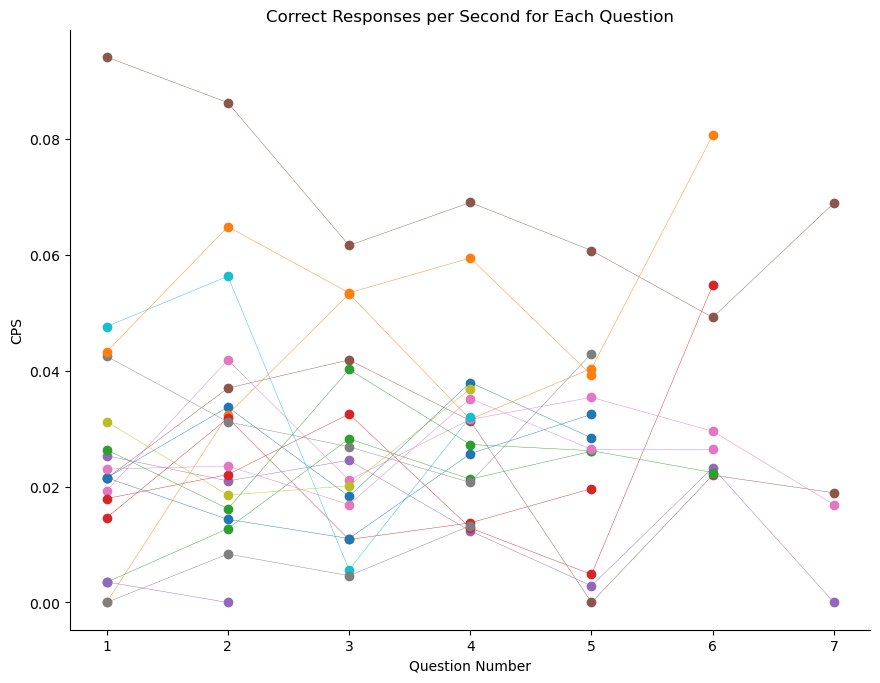

In [29]:
fig = plt.figure(figsize=(8,6), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(cps_df, marker='o', linewidth=0.3)
ax.set_xlabel('Question Number')
ax.set_ylabel('CPS')
ax.set_title('Correct Responses per Second for Each Question')

remove_spines(ax)

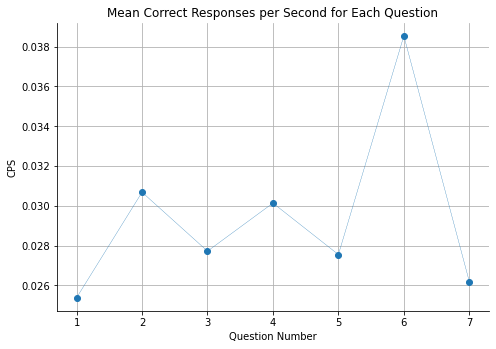

In [30]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(cps_df.mean(axis=1), marker='o', linewidth=0.3)
ax.grid()
ax.set_xlabel('Question Number')
ax.set_ylabel('CPS')
ax.set_title('Mean Correct Responses per Second for Each Question')

remove_spines(ax)

In [31]:
# Function that gets the number of correct responses and category of correct response per question

def get_correct_category(data_file):
    category_data = []
    current_question_number = -1
    correct_category = {}

    for entry in data_file:
        question_number = float(entry[1])
        time = float(entry[0])

        if  question_number > current_question_number:
            current_question_number = question_number
            category_data.append(correct_category)
            correct_category = {}
            continue
            
        if current_question_number == -1:
            continue
        
        if entry[2] == 'solution':
            try:
                data = ast.literal_eval(entry[3])
            except:
                continue
            for key, value in data.items():
                correct_category[key] = 1 if value['correct'] else 0
            
    return category_data[1:]

In [32]:
cat_df = pd.DataFrame(index=range(7))

for i, data_file in enumerate(load_data_files()):
    data = get_correct_category(data_file)
    temp = pd.DataFrame(data)
    column_names = {str(j): f"{i}{j}" for j in range(5)}
    temp.rename(columns=column_names, inplace=True)
    cat_df = cat_df.join(temp)

outer = list(repeated_int(5))
inner = cycle(range(5))
heir_columns = list(zip(outer, inner))
cat_df.columns = pd.MultiIndex.from_tuples(heir_columns)

cat_df

1                        2                       ...   17                 \
     0    1    2    3    4    0    1    2    3    4  ...    0    1    2    3   
0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0  1.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  ...  1.0  0.0  1.0  1.0   
2  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  ...  1.0  1.0  1.0  1.0   
4  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  ...  1.0  1.0  1.0  0.0   
5  NaN  NaN  NaN  NaN  NaN  0.0  1.0  0.0  1.0  1.0  ...  1.0  0.0  1.0  0.0   
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

         18                      
     4    0    1    2    3    4  
0  1.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  1.0  1.0  0.0  0.0  0.0  
2  1.0  0.0  0.0  1.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  0.0  0.0  
4  0.0  NaN  NaN  NaN  NaN  NaN  
5  0.0  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  NaN  

[7 rows x 90 columns]

In [33]:
data = []
for row in range(7):
    question = []
    for step in range(5):
        step_total = 0
        for participant in range(1, 19):
            if not math.isnan(cat_df.loc[row][participant][step]):
                step_total += cat_df.loc[row][participant][step]
        question.append(step_total)
    data.append(question)

cat_totals = pd.DataFrame(data)
cat_totals.index = range(1, 8)
cat_totals = cat_totals.join(peek_analysis['Number of Students'])

for i in range(5):
    cat_totals[f'percent_{i}'] = cat_totals[i]/cat_totals['Number of Students']

cat_totals

,0,1,2,3,4,Number of Students,percent_0,percent_1,percent_2,percent_3,percent_4
1,15.0,12.0,13.0,12.0,10.0,18,0.833333,0.666667,0.722222,0.666667,0.555556
2,16.0,14.0,14.0,13.0,11.0,18,0.888889,0.777778,0.777778,0.722222,0.611111
3,12.0,13.0,10.0,11.0,11.0,17,0.705882,0.764706,0.588235,0.647059,0.647059
4,8.0,17.0,12.0,13.0,13.0,17,0.470588,1.000000,0.705882,0.764706,0.764706
5,8.0,9.0,7.0,11.0,8.0,14,0.571429,0.642857,0.500000,0.785714,0.571429
6,4.0,6.0,5.0,6.0,5.0,7,0.571429,0.857143,0.714286,0.857143,0.714286
7,3.0,3.0,2.0,1.0,1.0,4,0.750000,0.750000,0.500000,0.250000,0.250000


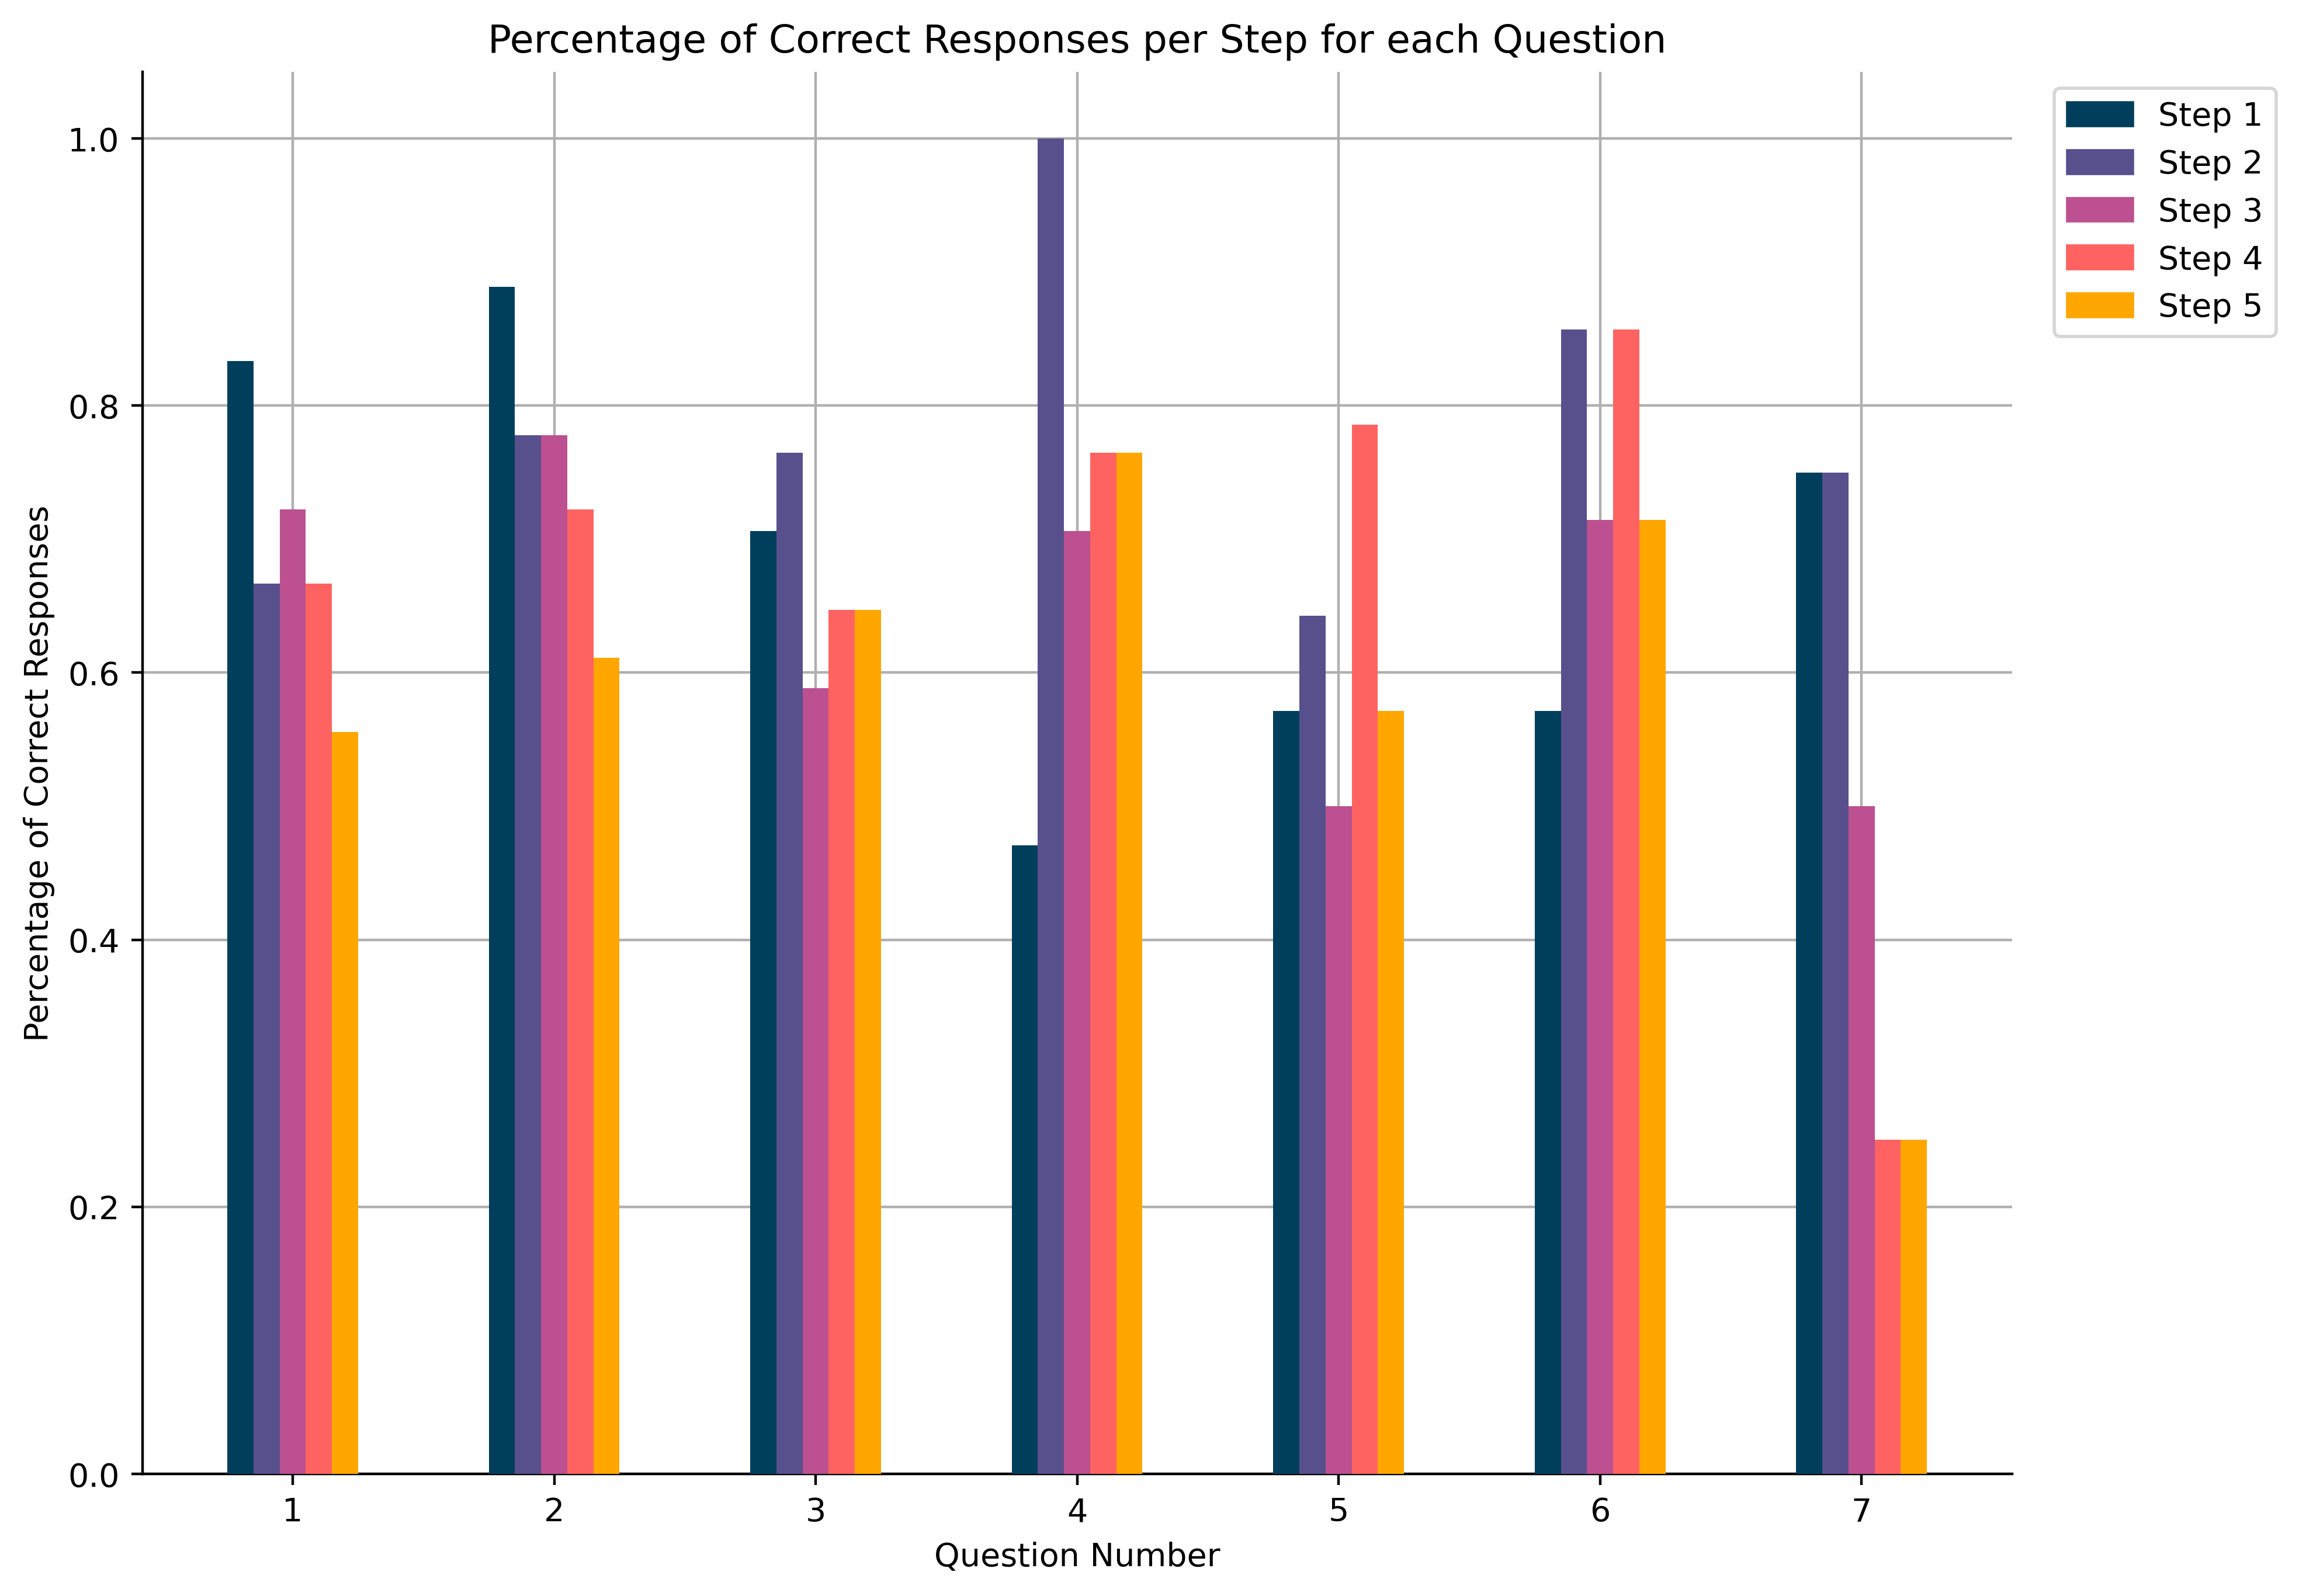

In [34]:
import matplotlib.patches as mpatches

handles = [mpatches.Patch(color=c, label=f'Step {i}') for i, c in enumerate(FIVE_COLORS, start=1)]

fig = plt.figure(figsize=(8, 6), dpi=400)
ax = fig.add_axes([0, 0, 1, 1])

x = np.arange(1, 8)
width = 0.1

for j, i in enumerate(range(2, -3, -1)):
    ax.bar(x - (i*width), cat_totals[j]/cat_totals['Number of Students'], width, zorder=3, color=FIVE_COLORS[j])
    
ax.grid(zorder=0)

ax.legend(handles=handles, loc=0, bbox_to_anchor=(1.15, 1))

ax.set_xlabel('Question Number')
ax.set_ylabel('Percentage of Correct Responses')
ax.set_title('Percentage of Correct Responses per Step for each Question')

remove_spines(ax)

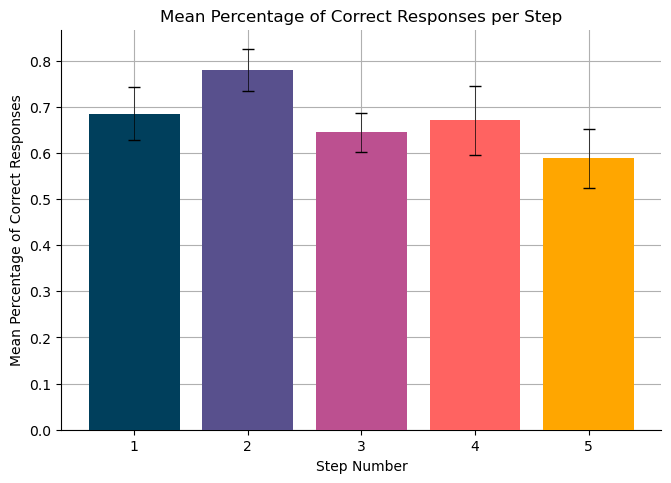

In [35]:
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])

x = np.arange(1, 6)

ax.bar(x, cat_totals.mean(axis=0)[6:], color=FIVE_COLORS, zorder=3,
       yerr=cat_totals.std(axis=0)[6:]/(cat_totals.count(axis=0)[6:]**0.5), 
       error_kw={'capsize': 4, 'elinewidth': 0.5})

ax.grid(zorder=0)

ax.set_xlabel('Step Number')
ax.set_ylabel('Mean Percentage of Correct Responses')
ax.set_title('Mean Percentage of Correct Responses per Step')

remove_spines(ax)

In [36]:
# Look at the types of errors the students are making - is it arithmetic or step. Define arithemtic and what I mean
# by step

In [37]:
# How would you characterise each particpant? What can you infer qualitatively? Use this to generate hypotheses.

In [38]:
# These analyses are based on the assumptions that all learners are doing the same thing. Perhaps averaging across
# the sample may not be as sensible.

In [154]:
# Gather data and create a peek dataframe

def get_modelling_data(data_file):
    question_number = -1
    show_model = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
    correct = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
    time_difference = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
    participant_data = []
    for row in data_file:
        time = row[0]
        question = row[1]
        event = row[2]
        if len(row) > 3:
            args = row[3]
        if int(question) > question_number:
            if int(question_number) != -1:
                for key, value in time_difference.items():
                    if value:
                        show_model[key] += float(time) - value
                participant_data.append(correct)
                participant_data.append(show_model)
            show_model = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
            correct = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
            time_difference = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
            question_number = int(question)
            continue
            
        if event == 'solution' or event == 'view_model':
            try:
                data = ast.literal_eval(args)
            except:
                continue
                
            if event == 'solution':
                for key, value in data.items():
                    correct[key] = 1 if value['correct'] else 0
            else:
                _id = str(data['id_number'])
                if time_difference[_id]:
                    show_model[_id] += float(time) - time_difference[_id]
                    time_difference[_id] = 0
                else:
                    time_difference[_id] = float(time)
    return participant_data

model_df = pd.DataFrame(index=range(14))
for i, data_file in enumerate(load_data_files()):
    data = get_modelling_data(data_file)
    df_temp = pd.DataFrame(data)
    df_temp.columns = [f'{i}{x}' for x in range(5)]
    model_df = model_df.join(df_temp)
    
row_inner = repeated_int(2, start=1, stop=8)
row_outer = cycle(['response', 'time'])
row_heir_index = zip(row_inner, row_outer)
model_df.index = pd.MultiIndex.from_tuples(row_heir_index)

col_inner = repeated_int(5)
col_outer = cycle(range(5))
col_heir_index = zip(col_inner, col_outer)
model_df.columns = pd.MultiIndex.from_tuples(col_heir_index)

model_df

1                                             2        \
                  0        1         2        3        4        0    1   
1 response  1.00000  0.00000   1.00000  1.00000  1.00000  0.00000  0.0   
  time      0.00000  6.42564   5.68261  0.00000  0.00000  0.00000  0.0   
2 response  1.00000  1.00000   1.00000  1.00000  1.00000  1.00000  1.0   
  time      0.00000  0.00000   0.00000  0.00000  0.00000  0.00000  0.0   
3 response  1.00000  1.00000   1.00000  0.00000  0.00000  1.00000  1.0   
  time      0.00000  0.00000   0.00000  2.68172  2.26011  0.00000  0.0   
4 response  1.00000  1.00000   1.00000  1.00000  1.00000  1.00000  1.0   
  time      8.12744  0.00000   0.00000  0.00000  0.00000  0.00000  0.0   
5 response  1.00000  1.00000   1.00000  1.00000  1.00000  1.00000  1.0   
  time      0.00000  0.00000  14.70938  0.00000  0.00000  0.00000  0.0   
6 response      NaN      NaN       NaN      NaN      NaN  1.00000  1.0   
  time          NaN      NaN       NaN      NaN      NaN  1.29404  0.0   
7 response      NaN      NaN       NaN      NaN      NaN      NaN  NaN   
  time          NaN      NaN       NaN      NaN      NaN      NaN  NaN   

                               ...   17                           18       \
                  2    3    4  ...    0    1        2    3    4    0    1   
1 response  0.00000  0.0  0.0  ...  1.0  1.0  1.00000  1.0  1.0  0.0  0.0   
  time      0.00000  0.0  0.0  ...  0.0  0.0  0.00000  0.0  0.0  0.0  0.0   
2 response  0.00000  1.0  1.0  ...  1.0  1.0  0.00000  1.0  1.0  1.0  1.0   
  time      5.87184  0.0  0.0  ...  0.0  0.0  2.94805  0.0  0.0  0.0  0.0   
3 response  1.00000  1.0  1.0  ...  1.0  0.0  1.00000  1.0  1.0  0.0  0.0   
  time      0.00000  0.0  0.0  ...  0.0  0.0  0.00000  0.0  0.0  0.0  0.0   
4 response  1.00000  0.0  1.0  ...  1.0  1.0  1.00000  1.0  1.0  1.0  1.0   
  time      0.00000  0.0  0.0  ...  0.0  0.0  0.00000  0.0  0.0  0.0  0.0   
5 response  1.00000  1.0  1.0  ...  1.0  1.0  1.00000  1.0  1.0  NaN  NaN   
  time      1.28143  0.0  0.0  ...  0.0  0.0  0.00000  0.0  0.0  NaN  NaN   
6 response  1.00000  1.0  1.0  ...  1.0  1.0  1.00000  1.0  0.0  NaN  NaN   
  time      0.00000  0.0  0.0  ...  0.0  0.0  0.00000  0.0  0.0  NaN  NaN   
7 response      NaN  NaN  NaN  ...  NaN  NaN      NaN  NaN  NaN  NaN  NaN   
  time          NaN  NaN  NaN  ...  NaN  NaN      NaN  NaN  NaN  NaN  NaN   

                           
              2    3    4  
1 response  0.0  0.0  0.0  
  time      0.0  0.0  0.0  
2 response  0.0  0.0  0.0  
  time      0.0  0.0  0.0  
3 response  0.0  1.0  0.0  
  time      0.0  0.0  0.0  
4 response  0.0  1.0  0.0  
  time      0.0  0.0  0.0  
5 response  NaN  NaN  NaN  
  time      NaN  NaN  NaN  
6 response  NaN  NaN  NaN  
  time      NaN  NaN  NaN  
7 response  NaN  NaN  NaN  
  time      NaN  NaN  NaN  

[14 rows x 90 columns]

In [190]:
def get_timeline_data(data_file):
    init_time = None
    data = []
    times = []
    correct_data = {'correct': 0, 'num': 0}
    for row in data_file:
        num = int(row[1]) + 1
        if num != 3 and num != 4:
            continue
        if init_time is None:
            init_time = float(row[0])
        x = float(row[0]) - init_time
        time = float("{:.2f}".format(x))
        event = row[2]
        if len(row) > 3:
            try:
                args = ast.literal_eval(row[3])
            except:
                args = None
        if event == 'next':
            if num == 4:
                data.append(f'Start {num}')
                times.append(time)
            
        elif event == 'peek':
            continue
            if args['peeking']:
                data.append(f'Peek OFF')
            else:
                data.append(f'Peek ON')
            times.append(time)
        
        elif event == 'solution':
            if num == 4:
                continue
            if args is None:
                continue
            for arg in args.values():
                if arg['correct']:
                    correct_data['correct'] += 1
            if correct_data['num'] == 4:
                data.append(f"Submit ({correct_data['correct']})")
                times.append(time)
                correct_data['num'] = -1
                correct_data['correct'] = 0
            correct_data['num'] += 1
            
        elif event == 'view_model':
            if num == 4:
                continue
            if args['show_model']:
                data.append(f"ON ({args['id_number']})")
            else:
                data.append(f"OFF ({args['id_number']})")
            times.append(time)
            
        elif event == 'ready':
            continue
            data.append('Cover')
            times.append(time)

    return data, times

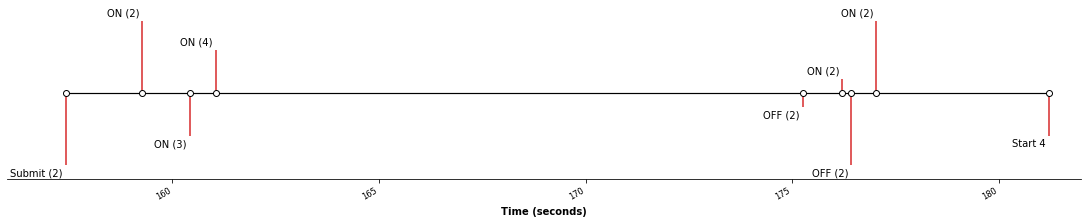

In [212]:
for i, data_file in enumerate(load_data_files()):
    data, times = get_timeline_data(data_file)
    if i == 10: # 4 and 10
        break

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(times)/6)))[:len(times)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 3), constrained_layout=True)
# ax.set(title="A Timeline of a Student Comparing Thier Solution with the Model for Question 3")

ax.vlines(times, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(times, np.zeros_like(times), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(times, levels, data):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_xlabel("Time (seconds)")
ax.set_xlim(156, 182)

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
save_fig('compare-timeline-question-3-b')

In [57]:
# Calculating the mean (and standard deviation) length of time spent on the tutorial

from statistics import mean, stdev, median

time_on_tutorial = []

for data_file in load_data_files():
    t0 = None
    for row in data_file:
        if t0 is None:
            t0 = float(row[0])
        if row[2] == 'solution':
            time_on_tutorial.append(float(row[0]) - t0)
            break

print("Mean: ", mean(time_on_tutorial))
print("Median: ", median(time_on_tutorial))
print("Stdev: ", stdev(time_on_tutorial))

Mean:  98.35516166666666
Median:  112.57111999999998
Stdev:  36.29990632571616


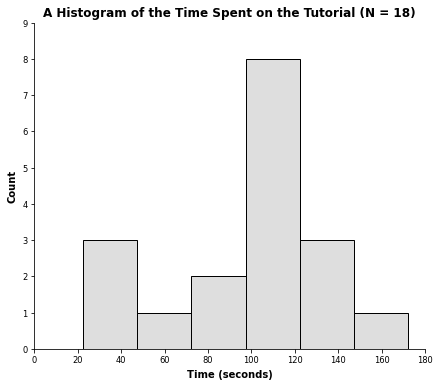

In [67]:
# Drawing a histogram of time on task

fig = plt.figure(figsize=(7,6))

ax = sns.histplot(
    data=time_on_tutorial, 
    binwidth=25,
    color='lightgrey'
)

ax.set_xlabel('Time (seconds)')
ax.set_title('A Histogram of the Time Spent on the Tutorial (N = 18)')
save_fig('time-on-tutorial')

In [68]:
# Calculating the mean (and standard deviation) length of time spent on CCC task

from statistics import mean, stdev, median

time_on_task = []

for data_file in load_data_files():
    t0 = None
    for row in data_file:
        if row[1] == '-1':
            continue
        if t0 is None:
            t0 = float(row[0])
    time_on_task.append(float(row[0]) - t0)

print("Mean: ", mean(time_on_task))
print("Median: ", median(time_on_task))
print("Stdev: ", stdev(time_on_task))

Mean:  878.5468933333333
Median:  1022.66236
Stdev:  236.35311660954847


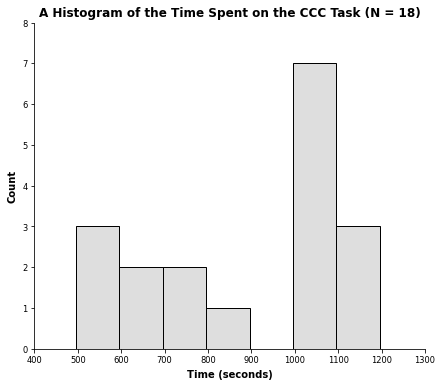

In [73]:
# Drawing a histogram of time on task

fig = plt.figure(figsize=(7,6))

ax = sns.histplot(
    data=time_on_task, 
    binwidth=100,
    color='lightgrey'
)

ax.set_xlabel('Time (seconds)')
ax.set_title('A Histogram of the Time Spent on the CCC Task (N = 18)')
save_fig('time-on-task')

In [46]:
# Calculating the mean of the length of the interviews

interview_times = []

def convert(mins, secs):
    interview_times.append((mins * 60) + secs)

times = ((12, 51), (9, 44), (8, 6), (9, 40), (7, 48), (15, 6))

for mins, secs in times:
    convert(mins, secs)
    
print("Mean: ", mean(interview_times))
print("Std: ", stdev(interview_times))

Mean:  632.5
Std:  171.82287391380694
